<a href="https://colab.research.google.com/github/ujjwaliitk/Cosmic_Quarry/blob/main/Stock_market_predictor_eco723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [378]:
from tensorflow import keras

In [379]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime



In [380]:

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
data = yf.download("MSFT", start ="2005-01-01", end= "2025-06-29", interval="1d")

data.columns = ['_'.join(col).strip() for col in data.columns.values]

/tmp/ipython-input-380-829013433.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("MSFT", start ="2005-01-01", end= "2025-06-29", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [381]:

data["volatility"] = 100*abs(data["Close_MSFT"] - data["Open_MSFT"]) / data["Open_MSFT"]


print(data.head())
print(data.info())
print(data.describe())

            Close_MSFT  High_MSFT   Low_MSFT  Open_MSFT  Volume_MSFT  \
Date                                                                   
2005-01-03   18.485224  18.630396  18.423007  18.526701     65002900   
2005-01-04   18.554354  18.734091  18.429920  18.575093    109442100   
2005-01-05   18.512873  18.734087  18.499046  18.554350     72463500   
2005-01-06   18.492134  18.706435  18.416091  18.561264     76890500   
2005-01-07   18.436829  18.588913  18.402264  18.540523     68723300   

            volatility  
Date                    
2005-01-03    0.223879  
2005-01-04    0.111651  
2005-01-05    0.223545  
2005-01-06    0.372441  
2005-01-07    0.559283  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5154 entries, 2005-01-03 to 2025-06-27
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close_MSFT   5154 non-null   float64
 1   High_MSFT    5154 non-null   float64
 2   Low_MSFT     5154 non-n

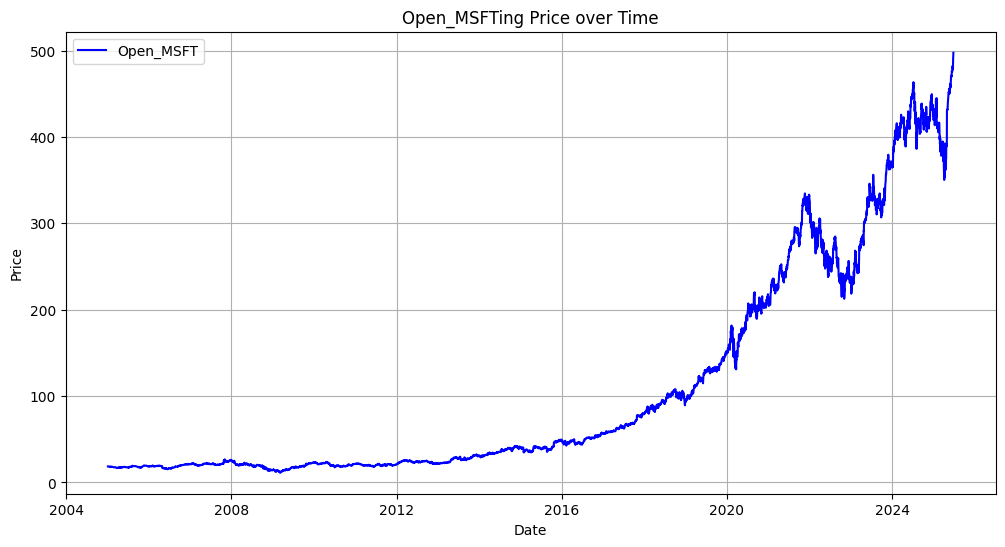

In [382]:

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Open_MSFT'], label="Open_MSFT", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Open_MSFTing Price over Time")
plt.legend()
plt.grid(True)
plt.show()

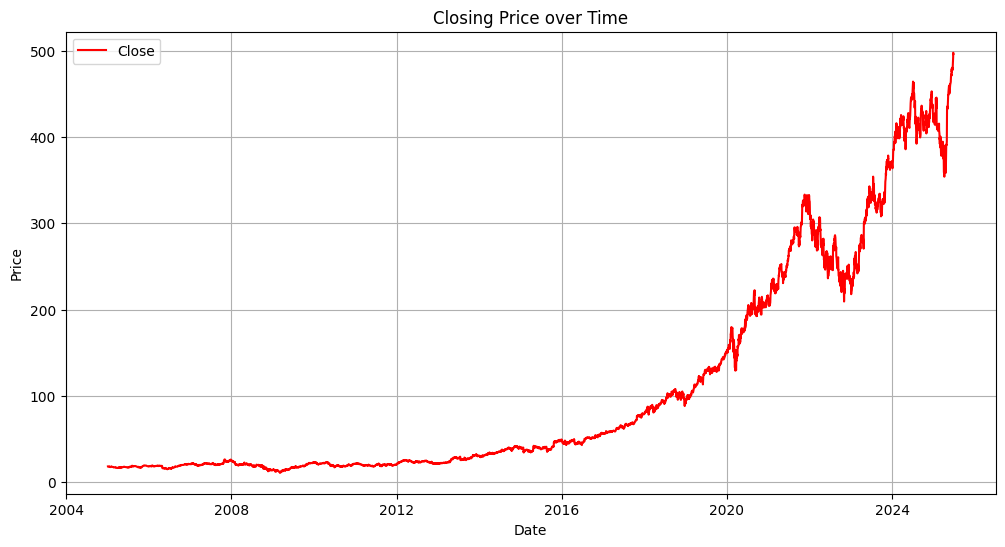

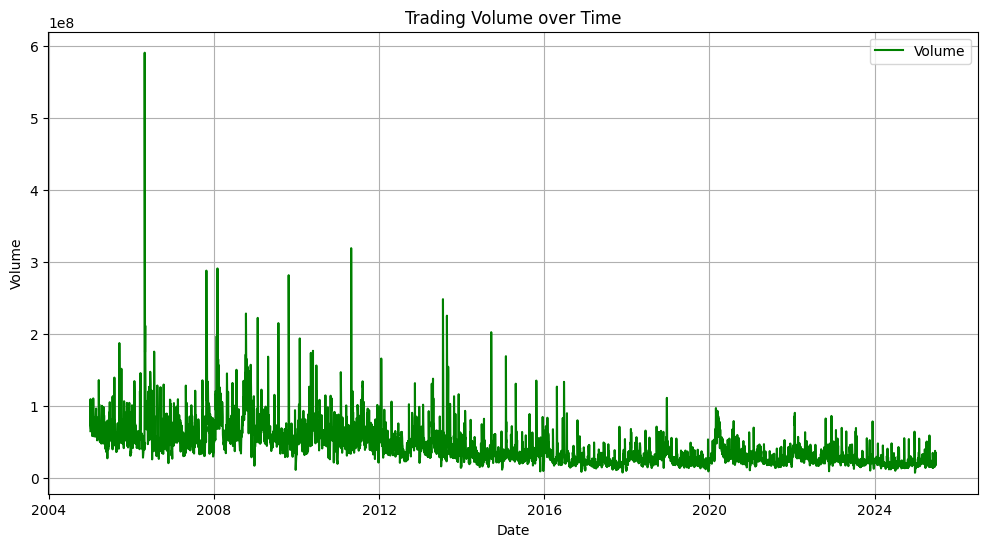

In [383]:

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close_MSFT'], label="Close", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Closing Price over Time")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Volume_MSFT'], label="Volume", color="green")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Trading Volume over Time")
plt.legend()
plt.grid(True)
plt.show()

In [384]:
stock_close = data.Close_MSFT
dataset = stock_close.values
training_data_len = int(np.ceil(len(dataset) * 0.95))

print(training_data_len)

4897


In [385]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

training_data = scaled_data[:training_data_len]

x_train, y_train = [],[]

In [386]:
for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])

In [387]:
x_train, ytrain = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [388]:
model = keras.models.Sequential()

#layers
#1st layer - LSTM 1
model.add(keras.layers.LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#drop 0.3
model.add(keras.layers.Dropout(0.3))

#2nd layer - LSTM 2
model.add(keras.layers.LSTM(units=128, return_sequences=False))

#drop 0.3
model.add(keras.layers.Dropout(0.3))

#3rd layer - Dense
model.add(keras.layers.Dense(256, activation="relu"))

#4th layer -Dense
model.add(keras.layers.Dense(units=1))

model.summary()

model.compile(optimizer="adam", loss="mae",metrics=[keras.metrics.RootMeanSquaredError()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,425 (904.00 KB)

 Trainable params: 231,425 (904.00 KB)

 Non-trainable params: 0 (0.00 B)

In [403]:
training = model.fit(x_train, ytrain, epochs=20, batch_size=16)

#preparing the data
test_data= scaled_data[training_data_len - 60:]

x_test = []
y_test = dataset[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Epoch 1/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0349 - root_mean_squared_error: 0.0612
Epoch 2/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0355 - root_mean_squared_error: 0.0603
Epoch 3/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0328 - root_mean_squared_error: 0.0588
Epoch 4/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0323 - root_mean_squared_error: 0.0578
Epoch 5/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0349 - root_mean_squared_error: 0.0654
Epoch 6/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0332 - root_mean_squared_error: 0.0597
Epoch 7/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0346 - root_mean_squared_error: 0.0598
Epoch 8/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0320 - root_mean_squared_error: 0.0566
Epoch 9/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0343 - root_mean_squared_error: 0.0598
Epoch 10/20
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0311 - root_mean_squared

In [404]:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [405]:
train = data[:training_data_len]
test = data[training_data_len:]

test = test.copy()
test['Predictions'] = predictions

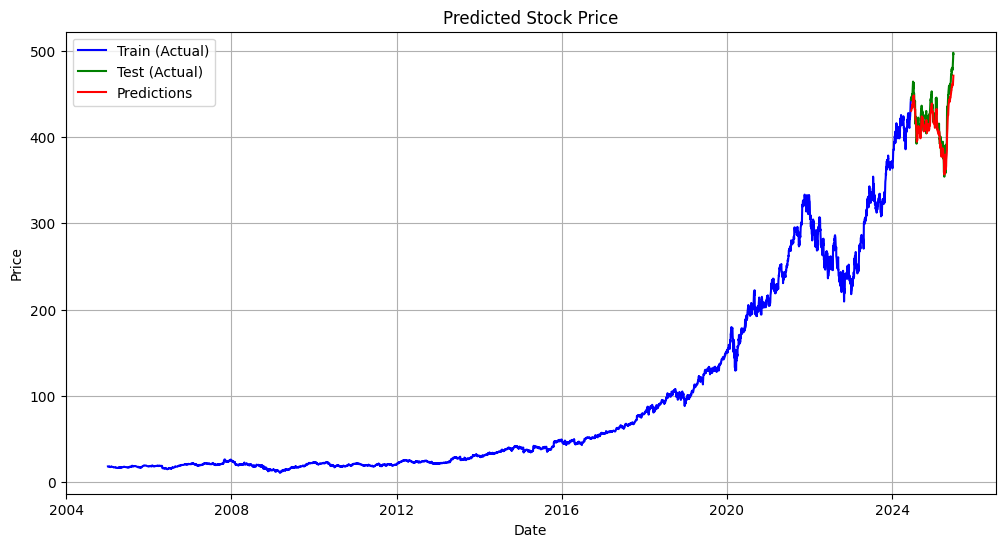

In [406]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Close_MSFT'], label="Train (Actual)", color="blue")
plt.plot(test.index, test['Close_MSFT'], label="Test (Actual)", color="green")
plt.plot(test.index, test['Predictions'], label="Predictions", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Predicted Stock Price")
plt.legend()
plt.grid(True)
plt.show()

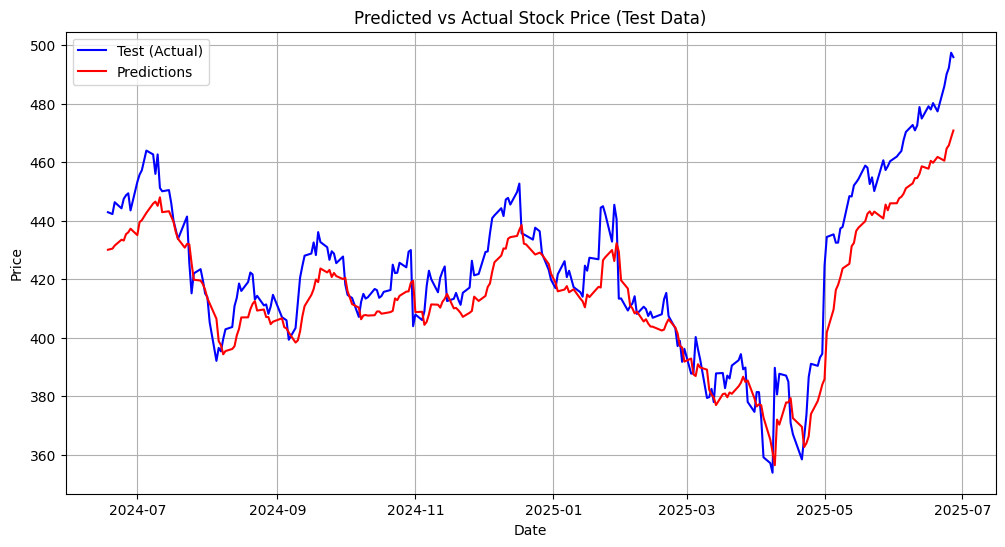

In [407]:


plt.figure(figsize=(12,6))
plt.plot(test.index, test['Close_MSFT'], label="Test (Actual)", color="blue")
plt.plot(test.index, test['Predictions'], label="Predictions", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Predicted vs Actual Stock Price (Test Data)")
plt.legend()
plt.grid(True)


plt.show()



In [408]:
from sklearn.metrics import mean_squared_error
# Calculate MAPE
mape = mean_squared_error(test['Close_MSFT'], test['Predictions'])
print(f"Mean squared error on test: {mape:.2f}%")

Mean squared error on test: 145.14%


In [409]:


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(test['Close_MSFT'], test['Predictions'])
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 2.29%
